In [2]:
import importlib

from pathlib import Path
import datafawn

importlib.reload(datafawn)

<module 'datafawn' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\datafawn\\__init__.py'>

In [ ]:
# TODO: add pose estimation to the pipeline

Dataframe with relative positions created:
Original shape: (615, 117)
New shape: (615, 129)

New bodyparts added:
['back_left_paw_rel', 'back_right_paw_rel', 'front_left_paw_rel', 'front_right_paw_rel']


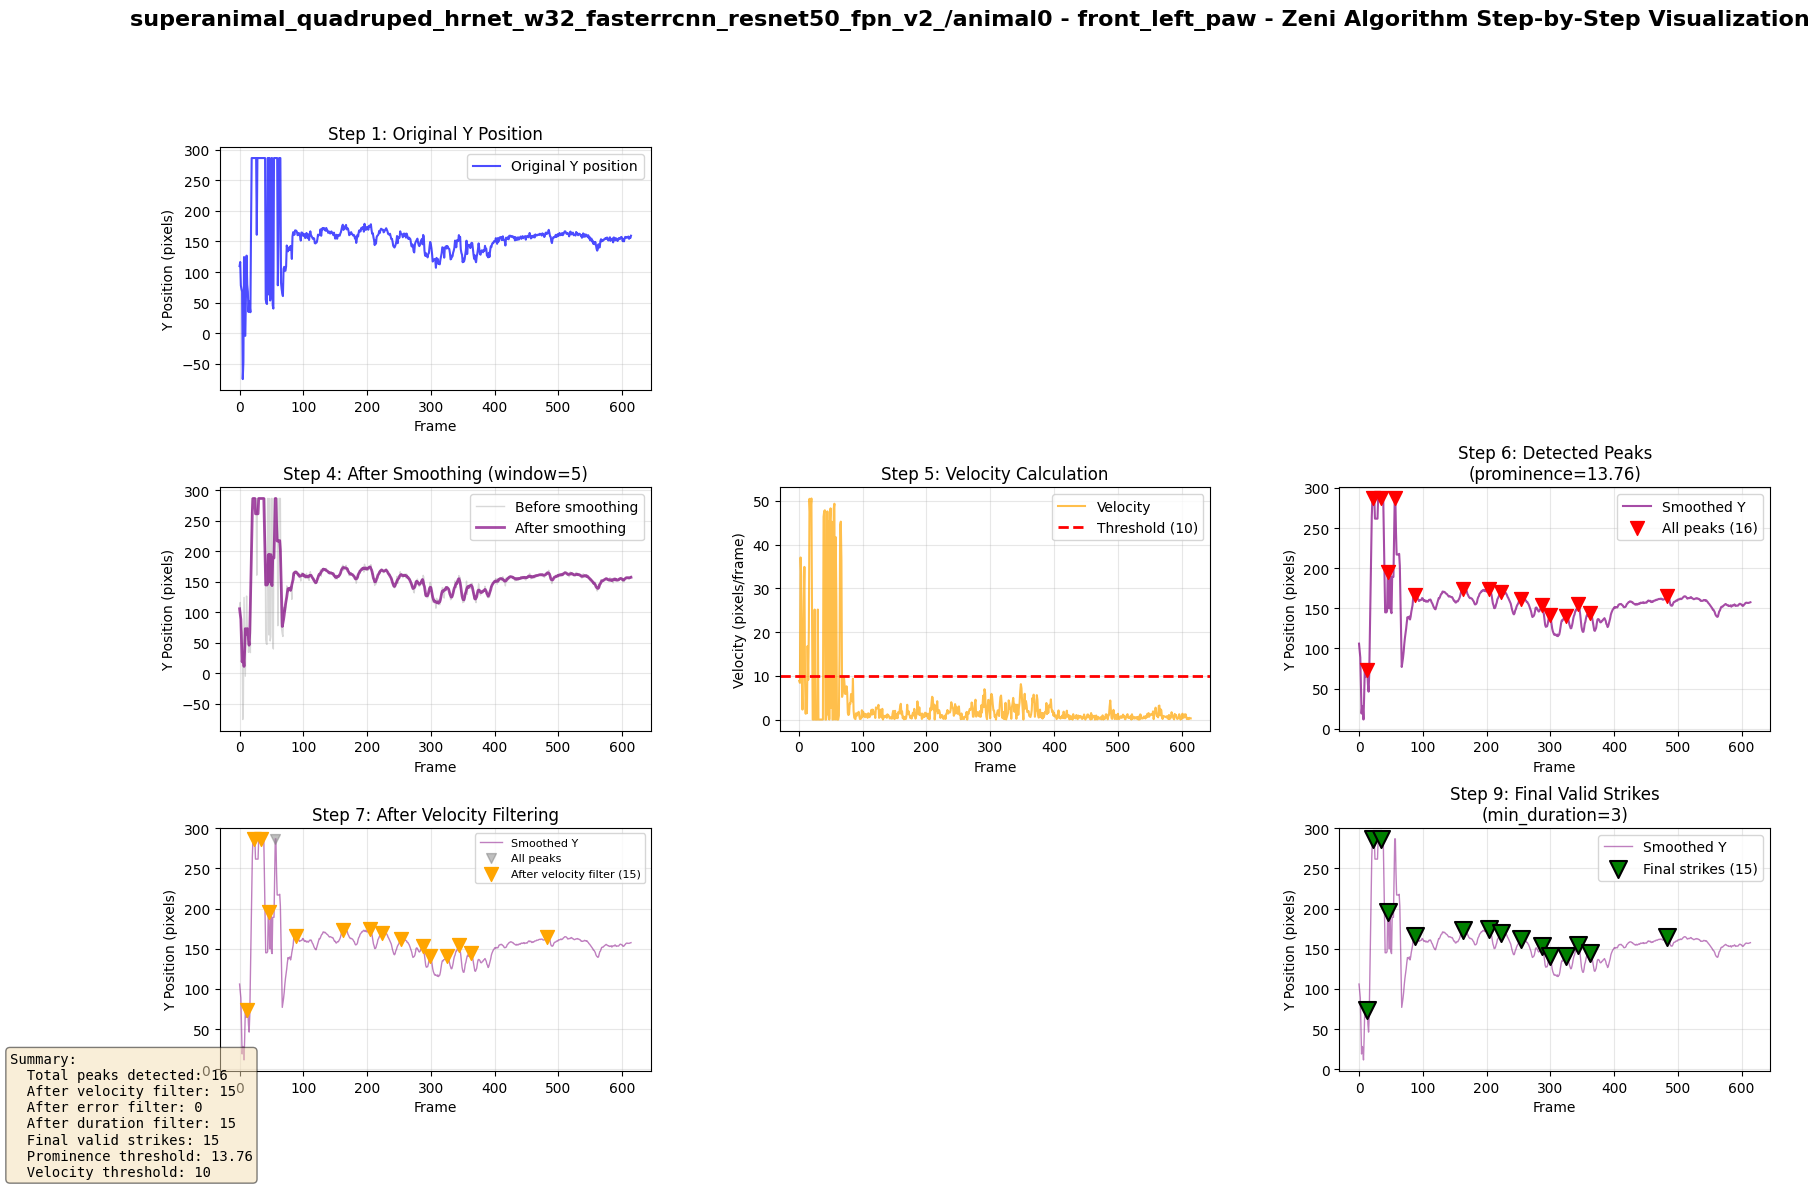

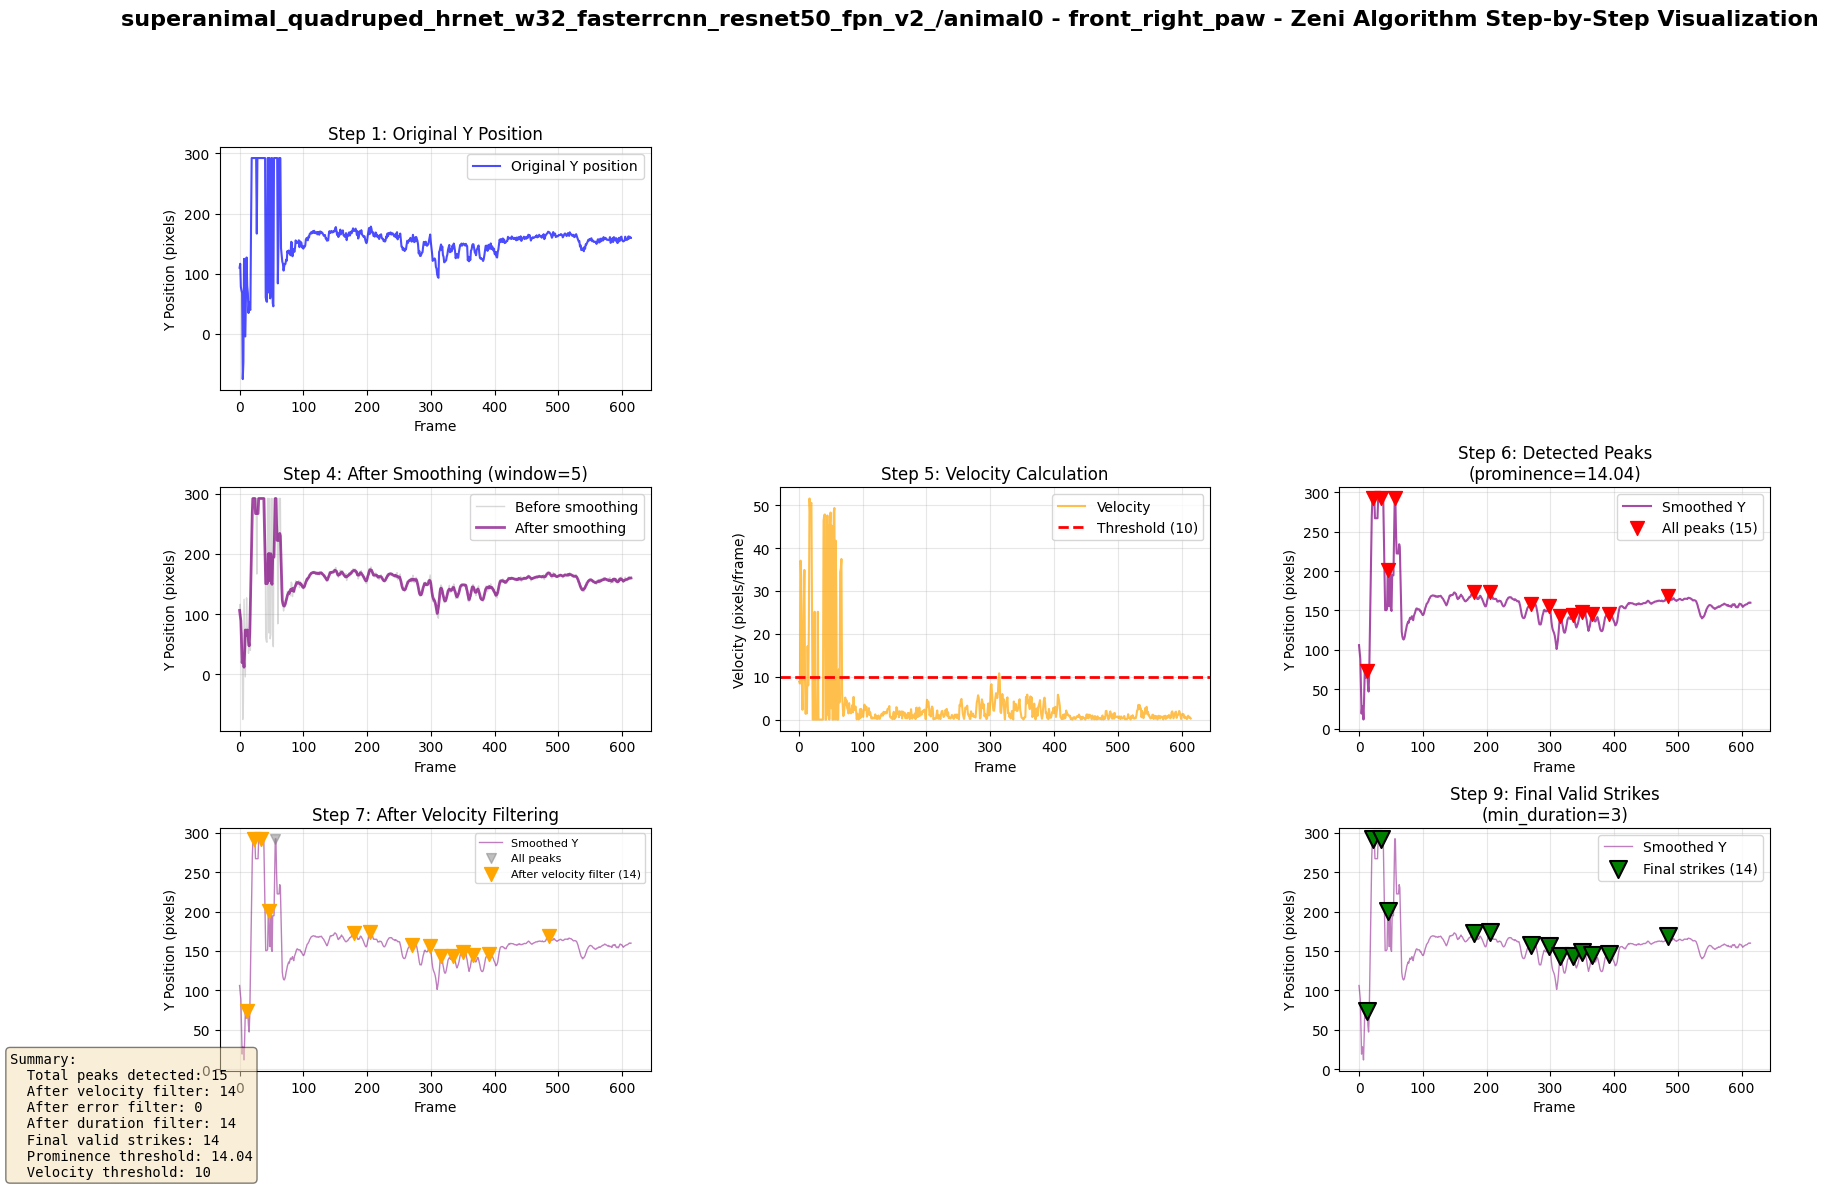

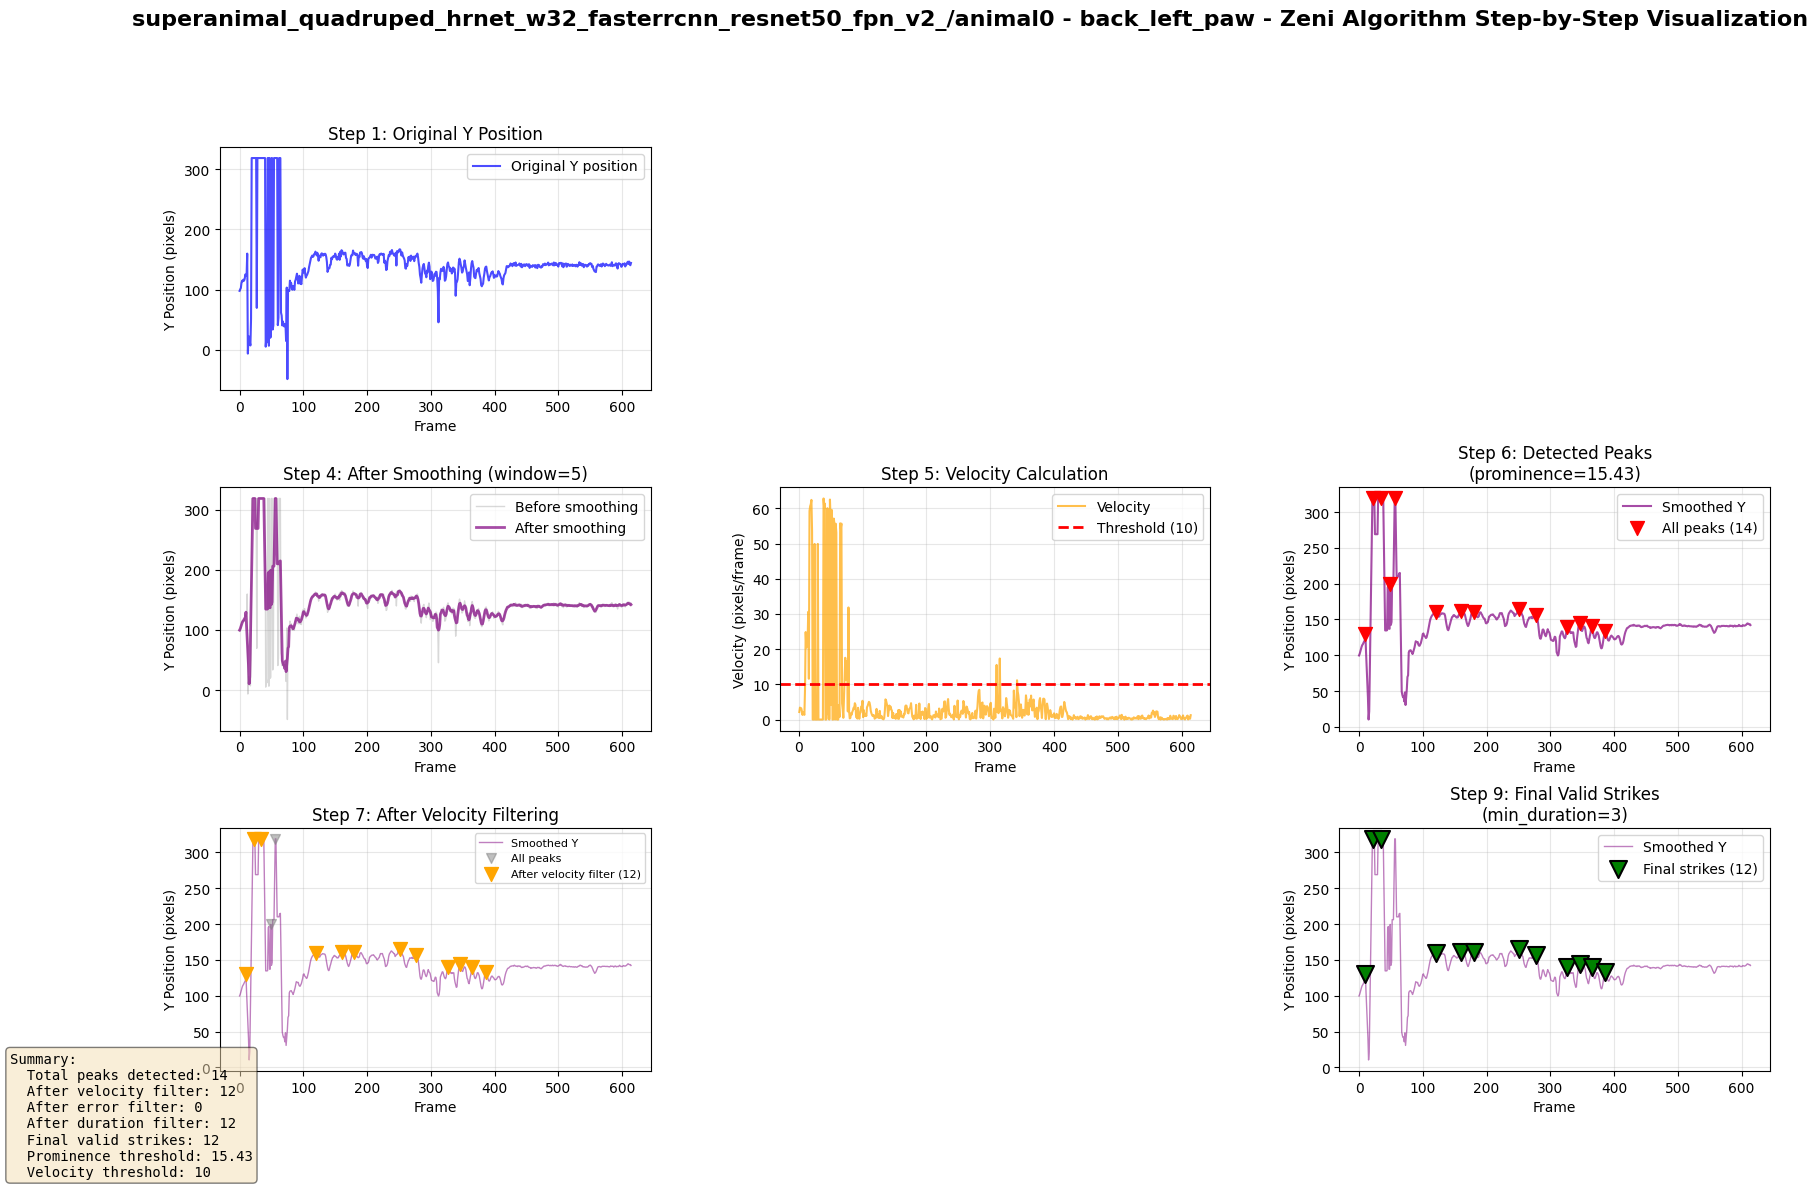

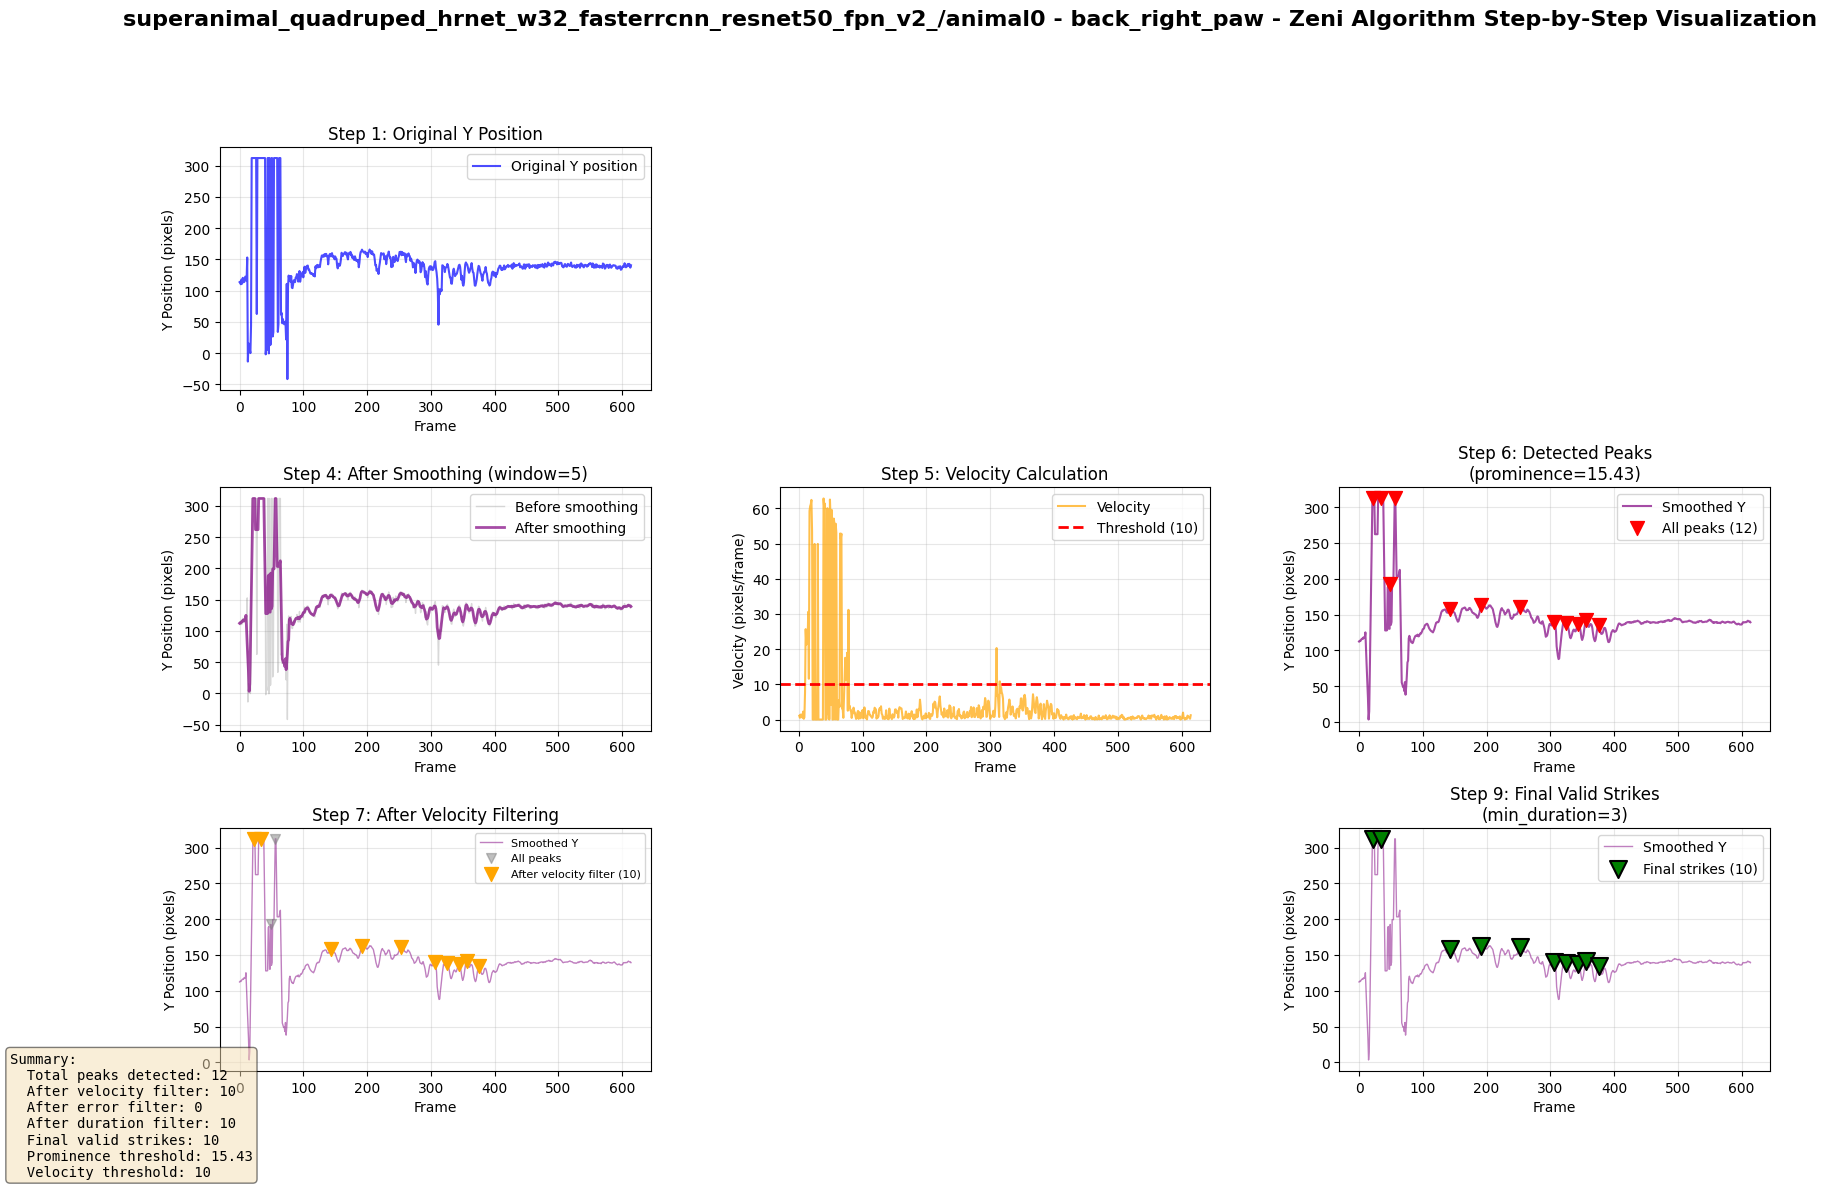

In [3]:
"""Example: Run pipeline on existing pose data."""

EXAMPLE_DATA_PATH = "deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_.h5"

# =============== POSTPROCESSORS =============== #
paws = ['front_left_paw', 'front_right_paw', 'back_left_paw', 'back_right_paw']
reference_map = {
    'back_base': ['front_left_paw', 'front_right_paw'],
    'tail_base': ['back_left_paw', 'back_right_paw']
}
error_pp = datafawn.ErrorPostprocessor(
    bodyparts=paws,
    use_velocity=True,
    use_likelihood=True,
    use_distance=True,
    velocity_kwargs={'threshold_pixels': 50, 'window_size': 5},
    likelihood_kwargs={'min_likelihood': 0.5},
    distance_kwargs={'reference_map': reference_map, 'max_distance': 300}
    )

rel_pp = datafawn.RelativePawPositionPostprocessor()


# =============== EVENT EXTRACTORS =============== #
zeni_extractor = datafawn.ZeniExtractor()

# Create pipeline
pipeline = datafawn.EventDetectionPipeline(
    postprocessors=[error_pp, rel_pp],
    event_extractors=[zeni_extractor]
)

# Run on existing pose data
results = pipeline.run(
    pose_data_path=EXAMPLE_DATA_PATH
)



In [3]:
results.keys()

dict_keys(['pose_data', 'postprocessed_data', 'events', 'metadata'])

In [4]:
# Access results
print("Pose data shape:", results['pose_data'].shape)
print("Postprocessed data shape:", results['postprocessed_data'].shape)
print("Event extractors run:", results['metadata']['extractor_names'])

Pose data shape: (615, 117)
Postprocessed data shape: (615, 129)
Event extractors run: ['zeni']


In [5]:
results['events']

{'zeni': {'strikes': {('superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_',
    'animal0'): {'front_left_paw': [12,
     22,
     34,
     46,
     88,
     163,
     204,
     223,
     254,
     287,
     299,
     325,
     344,
     363,
     483],
    'front_right_paw': [12,
     22,
     34,
     46,
     180,
     205,
     270,
     298,
     316,
     335,
     350,
     366,
     392,
     485],
    'back_left_paw': [10, 22, 34, 120, 160, 180, 251, 277, 327, 346, 365, 386],
    'back_right_paw': [22, 34, 143, 192, 253, 306, 325, 344, 356, 376]}},
  'metadata': {'window_size': 5,
   'min_contact_duration': 3,
   'velocity_threshold': 10,
   'prominence_percentage': 0.05}}}

# ADD SOUNDS

In [6]:
# TODO: add this to the pipeline

In [7]:
from add_sounds_to_video import add_sounds_for_all_paws

import importlib
import add_sounds_to_video

importlib.reload(add_sounds_to_video)

<module 'add_sounds_to_video' from 'c:\\Users\\jexia\\OneDrive\\Documents\\projects\\datafawn\\add_sounds_to_video.py'>

In [13]:
strikes_parsed = results['events']['zeni']['strikes'][('superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2_',
  'animal0')]
strikes_parsed

{'front_left_paw': [12,
  22,
  34,
  46,
  88,
  163,
  204,
  223,
  254,
  287,
  299,
  325,
  344,
  363,
  483],
 'front_right_paw': [12,
  22,
  34,
  46,
  180,
  205,
  270,
  298,
  316,
  335,
  350,
  366,
  392,
  485],
 'back_left_paw': [10, 22, 34, 120, 160, 180, 251, 277, 327, 346, 365, 386],
 'back_right_paw': [22, 34, 143, 192, 253, 306, 325, 344, 356, 376]}

In [14]:


# Define different sounds for each paw
paw_sound_map = {
    'front_left_paw': 'sounds/22415__anthousai__wind-chimes/398494__anthousai__wind-chimes-single-01.wav',
    'front_right_paw': 'sounds/22415__anthousai__wind-chimes/398493__anthousai__wind-chimes-single-02.wav',
    'back_left_paw': 'sounds/22415__anthousai__wind-chimes/398492__anthousai__wind-chimes-single-03.wav',
    'back_right_paw': 'sounds/22415__anthousai__wind-chimes/398496__anthousai__wind-chimes-single-04.wav'
}


# Add all sounds to video at once
output_path = add_sounds_for_all_paws(
    video_path='processed_vids\\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4',
    strikes_dict=strikes_parsed,  # Your strikes from zeni_algorithm
    paw_sound_map=paw_sound_map,
    output_path = 'finished_vids/pipelines_test_1.mp4')

Loading video: processed_vids\deer2_superanimal_quadruped_hrnet_w32_fasterrcnn_resnet50_fpn_v2__labeled_before_adapt.mp4
Video FPS: 29.97002997002997
Video duration: 20.52 seconds

Processing front_left_paw:
  Found 15 strikes
  Strike timestamps: ['0.40s', '0.73s', '1.13s']...
  Sound duration: 5.00 seconds
  Created 15 audio clips for front_left_paw

Processing front_right_paw:
  Found 14 strikes
  Strike timestamps: ['0.40s', '0.73s', '1.13s']...
  Sound duration: 3.16 seconds
  Created 14 audio clips for front_right_paw

Processing back_left_paw:
  Found 12 strikes
  Strike timestamps: ['0.33s', '0.73s', '1.13s']...
  Sound duration: 3.19 seconds
  Created 12 audio clips for back_left_paw

Processing back_right_paw:
  Found 10 strikes
  Strike timestamps: ['0.73s', '1.13s', '4.77s']...
  Sound duration: 4.04 seconds
  Created 10 audio clips for back_right_paw

Total audio clips created: 51

Writing output video to: finished_vids\pipelines_test_1.mp4
MoviePy - Building video finishe

MoviePy - Done.
MoviePy - Writing video finished_vids\pipelines_test_1.mp4



MoviePy - Done !
MoviePy - video ready finished_vids\pipelines_test_1.mp4
Done! Output saved to: finished_vids\pipelines_test_1.mp4
